# DSR 21 - Backprop course

## 2. perceptron backprop



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [17]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        out = 1 / (1 + np.exp(-1 * x))
        
        return out

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
        return x * (1 - x)

    def predict(self, x):
        # take the dot product between our features and weight matrix
        preds = self.sigmoid_activation(x @ self.W)
        
        # return the predictions
        return preds

    def fit(self, X, y, epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        losses=[]
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = 0.5 * np.sum(error**2)
            
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)#X.T.dot(d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        pass

Perceptron.predict(, 5)

NameError: name 'self' is not defined

In [7]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=1.5, random_state=42)
y = y.reshape((y.shape[0], 1))
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

NameError: name 'testX' is not defined

### Modify Perceptron Class such that you save the training losses and return them 

In [8]:
epochs = 100
alpha = 0.001
# create Perceptron object and train keep the losses
### YOUR CODE HERE


training...
epoch=  1 , loss=  27.40347529601197
epoch=  2 , loss=  3.948946985876526
epoch=  3 , loss=  3.097064685014394
epoch=  4 , loss=  2.699709718838216
epoch=  5 , loss=  2.4745164566113935
epoch=  6 , loss=  2.331397776129146
epoch=  7 , loss=  2.232831074741041
epoch=  8 , loss=  2.160602692328183
epoch=  9 , loss=  2.1049333632578136
epoch=  10 , loss=  2.0601811229786007
epoch=  11 , loss=  2.022910345372898
epoch=  12 , loss=  1.9909387061534394
epoch=  13 , loss=  1.9628318631416901
epoch=  14 , loss=  1.9376199395829656
epoch=  15 , loss=  1.9146310143985805
epoch=  16 , loss=  1.8933895788229353
epoch=  17 , loss=  1.8735526300639809
epoch=  18 , loss=  1.8548683631562257
epoch=  19 , loss=  1.8371488510831642
epoch=  20 , loss=  1.8202516136595244
epoch=  21 , loss=  1.8040669647752041
epoch=  22 , loss=  1.7885091915963314
epoch=  23 , loss=  1.773510319983864
epoch=  24 , loss=  1.7590156528046945
epoch=  25 , loss=  1.7449805406488117
epoch=  26 , loss=  1.731368020

In [21]:
# evaluate our model
print("evaluating...")
### YOUR CODE HERE


# apply a step function to threshold the outputs to binary
# class labels (remember that the sigmoid gives vlues between 0 and 1: i.e. probabilities)
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      0.99      1.00       397

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



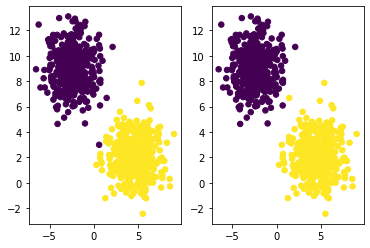

In [20]:
plt.subplot(1,2,1)
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=preds[:, 0], s=30)
plt.subplot(1,2,2)
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

In [15]:
## plot the loss as a function of epoch number

### YOUR CODE HERE ### 

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.
### This way we have multiple updates per epoch.

#### implement sgd in our perceptron class (batches of 16)

In [11]:
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
        ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self,x):
        # take the dot product between our features and weight matrix
        ### ENTER YOUR CODE HERE
        preds = np.dot(x,self.W)
        preds = self.sigmoid_activation(preds)
         
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        losses=[]
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = 0.5*np.sum(error ** 2)
            
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)#X.T.dot(d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        pass

In [12]:
# create a perceptron object and train it save the losses as losses2 and compare the 
# losses of the current and former percptrons
epochs = 100
alpha = 0.01

### YOUR CODE HERE ###

training...
epoch=  1 , loss=  2.9506661353507386
epoch=  2 , loss=  0.054290214550040836
epoch=  3 , loss=  0.0048150401413942084
epoch=  4 , loss=  0.9671255405588335
epoch=  5 , loss=  0.3320247065822107
epoch=  6 , loss=  0.07364381631142929
epoch=  7 , loss=  2.660998430678115e-05
epoch=  8 , loss=  0.16830530238351055
epoch=  9 , loss=  0.44927412169293857
epoch=  10 , loss=  0.00021722950284196012
epoch=  11 , loss=  0.01643336288269999
epoch=  12 , loss=  0.00018305125902345608
epoch=  13 , loss=  0.015641944870358374
epoch=  14 , loss=  0.0003832695604076285
epoch=  15 , loss=  0.00036528595314413103
epoch=  16 , loss=  0.00014195712107699544
epoch=  17 , loss=  5.5166639753852e-08
epoch=  18 , loss=  0.0002460036528767561
epoch=  19 , loss=  0.20189000501802204
epoch=  20 , loss=  9.052118459381999e-05
epoch=  21 , loss=  6.118558476318183e-06
epoch=  22 , loss=  1.4182567424200183e-06
epoch=  23 , loss=  0.38092631027998247
epoch=  24 , loss=  0.004526154732580824
epoch=  25

In [22]:
#plot the losses of both perceptrons
